In [44]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [45]:
# Load and clean up the data
df = pd.read_csv('./../datasets/diamonds/diamonds.csv')

# Display the first few rows of the dataset
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,Ideal,F,SI1,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,Very Good,F,VS2,61.7,57.0,4493,6.17,6.21,3.82


In [47]:
df.count()

carat      5000
cut        5000
color      5000
clarity    5000
depth      5000
table      5000
price      5000
x          5000
y          5000
z          5000
dtype: int64

In [50]:
df.sort_values('price').head(15)

,carat,cut,color,clarity,depth,table,price,x,y,z
2484,1.75,Ideal,J,SI1,63.3,59.0,-1,7.63,7.57,4.81
3155,0.31,Ideal,G,VS2,61.7,57.0,-1,4.33,4.36,2.68
3445,0.30,Premium,H,SI1,59.3,59.0,-1,4.38,4.36,2.59
4188,0.79,Ideal,H,VVS1,62.0,56.0,-1,5.92,5.96,3.68
331,1.00,Good,F,SI1,64.1,60.0,-1,6.25,6.19,3.99
3980,0.41,Very Good,H,VS2,63.4,58.0,-1,4.77,4.66,2.99
2933,1.51,Ideal,H,VS2,62.5,55.0,-1,7.29,7.34,4.57
2121,0.34,Ideal,E,VS2,59.8,56.0,-1,4.55,4.54,2.72
3904,0.90,Very Good,G,SI2,64.2,56.0,-1,6.04,6.11,3.90
3317,1.02,Premium,D,VS2,59.8,61.0,-1,6.61,6.54,3.93


- Price = -1 would be missing data points. We should remove them.

In [46]:
# Data cleaning and preprocessing
# (Example: Handling missing values, incorrect data entries, or removing outliers)

# Descriptive statistics
df.describe()


,carat,depth,table,price,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,0.794486,61.711660,57.447060,3925.53940,5.725188,5.727744,3.533076
std,0.468424,1.446206,2.258999,3975.45212,1.119156,1.112106,0.690334
min,0.230000,44.000000,51.600000,-1.00000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,936.00000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2392.50000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5369.25000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.00000,10.000000,9.850000,6.430000


- x, y, z = 0 is a bad data point. We should remove them.

In [58]:
df.groupby(['cut', 'color', 'clarity']).size().unstack().fillna(0).astype(int)


clarity          I1  IF  SI1  SI2  VS1  VS2  VVS1  VVS2
cut       color                                        
Fair      D       0   0    2    8    0    3     0     2
          E       1   0    7    4    0    7     0     2
          F       2   0    7   12    2    6     1     1
          G       7   0    5    9    3   10     0     0
          H       8   0   11    8    1    5     0     2
          I       3   0    2    4    1    3     0     0
          J       2   0    4    2    1    0     0     0
Good      D       0   1   19   26    2    9     4     2
          E       3   0   26   22   10   15     4     5
          F       2   1   25   12   13   20     3     2
          G       1   2   21   18   22   14     4    10
          H       0   0   14   16    6   12     2     6
          I       1   0   18    7   16   16     5     1
          J       1   0    7    5    3    3     0     0
Ideal     D       2   5   65   34   43   74    17    30
          E       1   2   88   42   59  107    32    39
          F       6  18   46   38   49   71    32    40
          G       2  39   61   40  109   98    52    66
          H       1  25   74   48   53   49    23    29
          I       4   9   50   24   38   37    27    13
          J       0   2   20   10   18   22     3     6
Premium   D       0   2   45   44   15   27     4     4
          E       6   2   56   45   22   51    12     8
          F       2   4   66   51   29   56    11    19
          G       3   9   55   38   51   71    19    33
          H       2   2   47   47   32   55    12    14
          I       0   2   39   24   32   31     6     7
          J       1   4   21   19   13   19     1     4
Very Good D       0   1   40   23   13   26     4    12
          E       0   5   67   37   23   59    20    29
          F       1   3   52   32   28   48    12    21
          G       1  10   41   38   43   45    16    31
          H       1   2   51   27   26   33    10    13
          I       0   0   29   17   13   24     7     7
          J       0   0   13   14   12   10     3     6

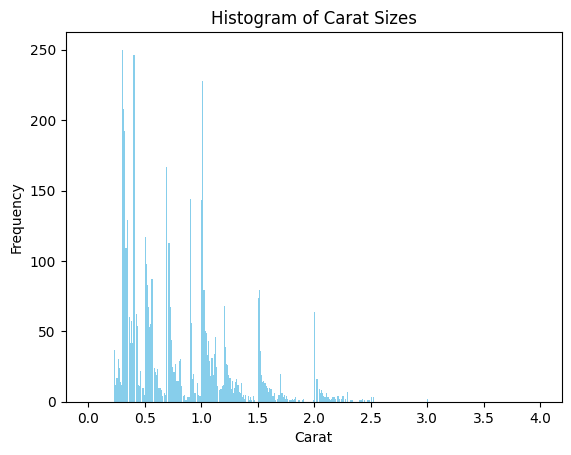

In [60]:
# Histograms of continuous features
# Adjusting bin sizes for better resolution and visualization
plt.hist(df['carat'], bins=np.arange(0, 4, 0.01), color='skyblue', edgecolor='None')
plt.title('Histogram of Carat Sizes')
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.show()

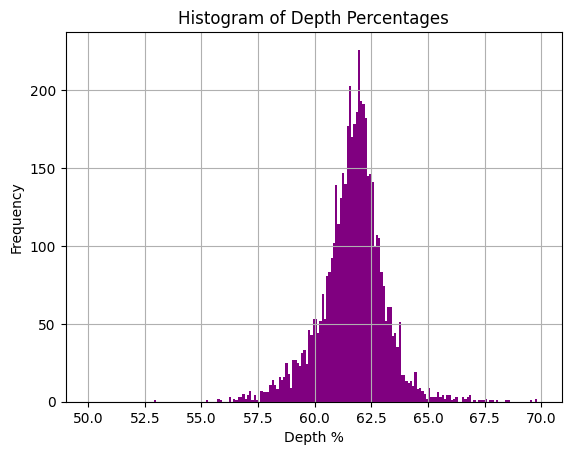

In [63]:

plt.hist(df['depth'], bins=np.arange(50, 70, 0.1), color='purple', edgecolor='None')
plt.title('Histogram of Depth Percentages')
plt.xlabel('Depth %')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


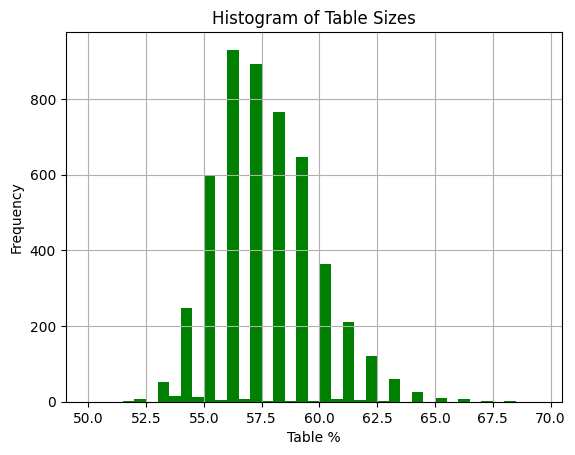

In [64]:

plt.hist(df['table'], bins=np.arange(50, 70, 0.5), color='green', edgecolor='none')
plt.title('Histogram of Table Sizes')
plt.xlabel('Table %')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


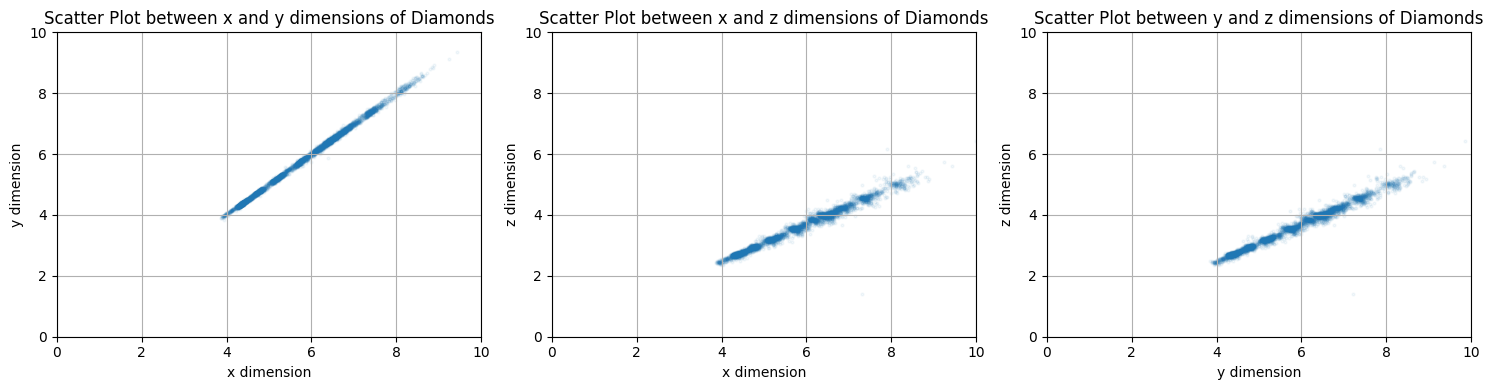

In [72]:
import matplotlib.pyplot as plt

# Set up a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Scatter plot for 'x' and 'y' dimensions
axs[0].scatter(df['x'], df['y'], alpha=0.05, s = 4)
axs[0].set_title('Scatter Plot between x and y dimensions of Diamonds')
axs[0].set_xlabel('x dimension')
axs[0].set_ylabel('y dimension')
axs[0].set_xlim(0, 10)
axs[0].set_ylim(0, 10)
axs[0].grid(True)

# Scatter plot for 'x' and 'z' dimensions
axs[1].scatter(df['x'], df['z'], alpha=0.05, s = 4)
axs[1].set_title('Scatter Plot between x and z dimensions of Diamonds')
axs[1].set_xlabel('x dimension')
axs[1].set_ylabel('z dimension')
axs[1].set_xlim(0, 10)
axs[1].set_ylim(0, 10)
axs[1].grid(True)

# Scatter plot for 'y' and 'z' dimensions
axs[2].scatter(df['y'], df['z'], alpha=0.05, s = 4)
axs[2].set_title('Scatter Plot between y and z dimensions of Diamonds')
axs[2].set_xlabel('y dimension')
axs[2].set_ylabel('z dimension')
axs[2].set_xlim(0, 10)
axs[2].set_ylim(0, 10)
axs[2].grid(True)

# Display the plots
plt.tight_layout()
plt.show()


- Recommendation: combine x, y, z into a volume variable.

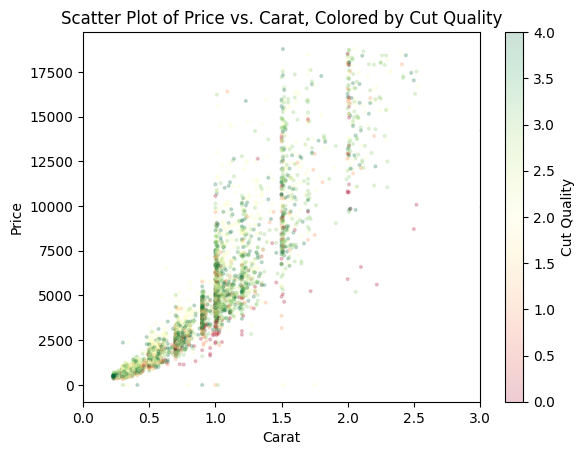

In [67]:
# Advanced scatter plot: Price vs. Carat, colored by Cut
df['cut'] = df['cut'].astype('category')
scatter = plt.scatter('carat', 'price', data=df, c=df['cut'].cat.codes, cmap='RdYlGn', alpha=0.2, s=4)
plt.xlim(0, 3)
plt.colorbar(scatter, label='Cut Quality')
plt.title('Scatter Plot of Price vs. Carat, Colored by Cut Quality')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()